## Tabla de contenidos

* [Introducción](#intro) 
* [Objetivos](#objectives)
* [Preprocesamiento de datos](#data_review)
* [Análisis exploratorio de datos](#eda)
* [Primera tarea](#first_task)
* [Segunda tarea](#second_task)
* [Tercera tarea](#third_task)
* [Cuarta tarea](#fourth_task)
* [Conclusiones](#end)

# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [123]:
#!pip install scikit-learn --upgrade

In [124]:
#Librerías usadas en el proyecto 

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import math

from IPython.display import display

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [125]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [126]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [127]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
387,1,31.0,41900.0,1,0
3611,1,36.0,33700.0,3,0
2623,0,28.0,43000.0,0,0
3732,0,40.0,63800.0,0,0
2247,1,33.0,43600.0,1,0
3425,0,38.0,43300.0,2,0
3551,0,39.0,51500.0,0,0
602,1,27.0,24400.0,0,0
3927,0,41.0,37300.0,2,0
3180,1,33.0,44600.0,2,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [129]:
# Conversión del tipo de datos de edad
df["age"] = df["age"].astype(int)

In [130]:
# Comprobación de la conversión 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [131]:
# Estadísticas descriptivas 
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [132]:
# Verifica duplicados
df.duplicated().sum()

153

In [133]:
# Porcentaje de duplicados
df.duplicated().sum() / df.shape[0]

0.0306

In [134]:
# Registros duplicados
df[df.duplicated()].head()

,gender,age,income,family_members,insurance_benefits
281,1,39,48100.0,1,0
488,1,24,32900.0,1,0
513,0,31,37400.0,2,0
718,1,22,32600.0,1,0
785,0,20,35800.0,0,0


In [135]:
# Eliminación de duplicados
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4847 non-null   int64  
 1   age                 4847 non-null   int64  
 2   income              4847 non-null   float64
 3   family_members      4847 non-null   int64  
 4   insurance_benefits  4847 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 227.2 KB


In [136]:
# Reseteo de indices
df = df.reset_index(drop=True)

**Conclusiones intermedias del preprocesamineto de datos** 

1. Los datos presentaron valores duplicados (3 %), los mismos que fueron eliminados.
2. Los nombres de las columnas se cambiaron a minúsculas.
3. El tipo de dato de edad se cambió de "float" a "int".
4. La base de datos no presentó valores ausentes.

## Análisis exploratorio de datos

### Análisis de pares

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

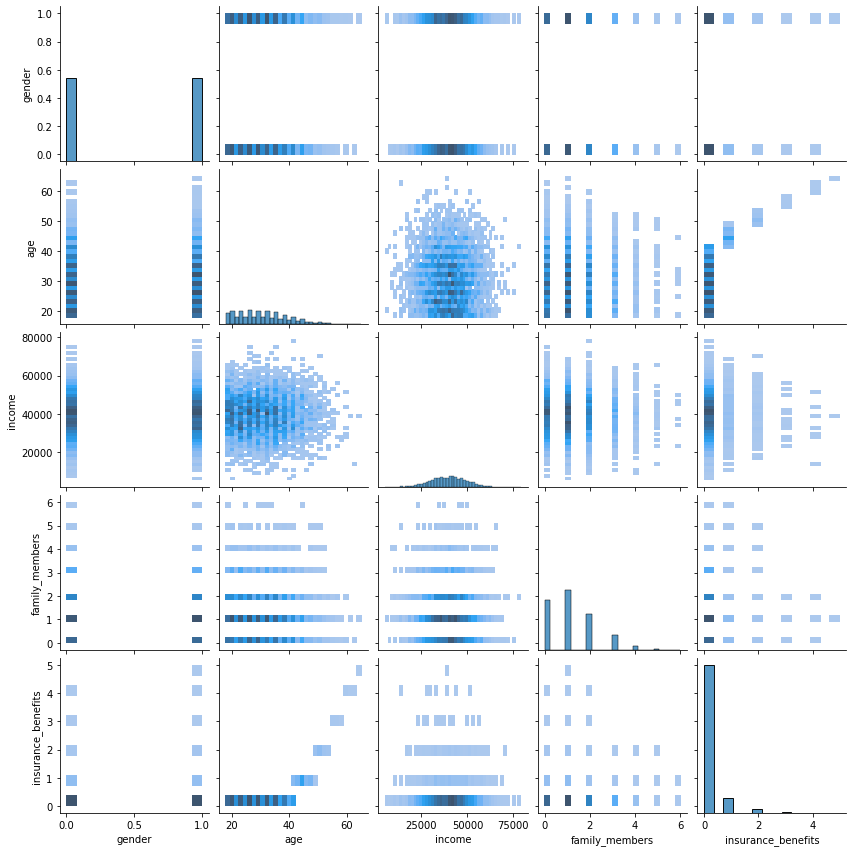

In [137]:
# Gráfico de pares

g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

### Análisis valores atípicos

In [138]:
# Se declaran las variables para el EDA

variables = ['gender', 'age',
             'income', 'family_members', 'insurance_benefits']

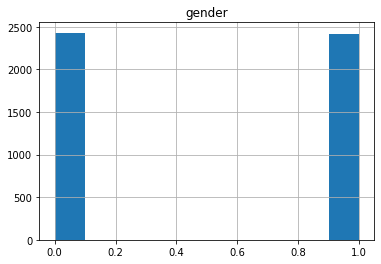

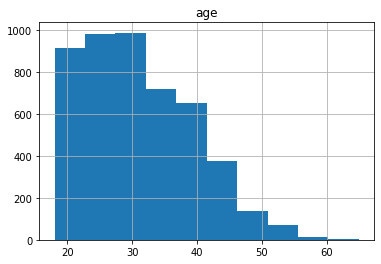

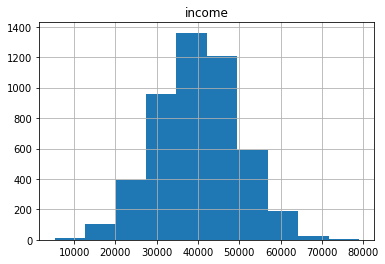

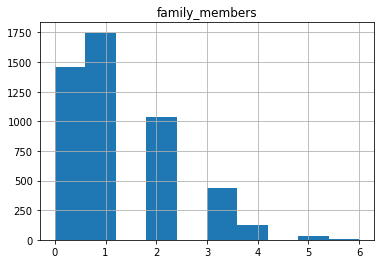

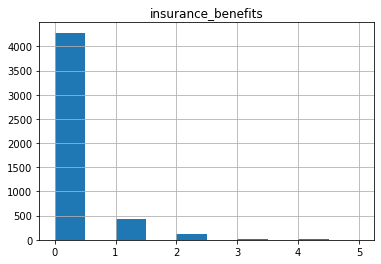

In [139]:
# Bucle para graficar histogramas

for i in range(len(variables)):
    df.hist(variables[i])

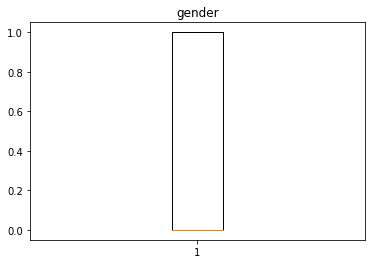

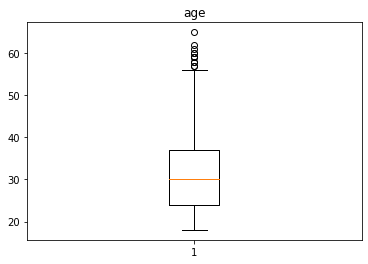

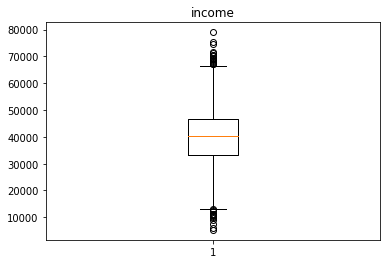

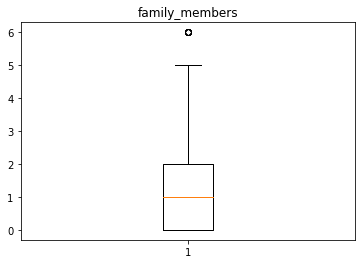

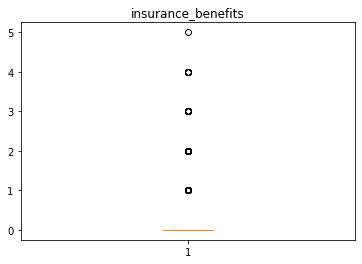

In [140]:
# Bucle para graficar diagramas de caja

for variable in variables:
    plt.figure()  
    plt.boxplot(df[variable])
    plt.title(variable)

In [141]:
# Matriz de correlación
df.corr()

,gender,age,income,family_members,insurance_benefits
gender,1.000000,0.001953,0.015456,-0.007315,0.011565
age,0.001953,1.000000,-0.017386,-0.009064,0.654964
income,0.015456,-0.017386,1.000000,-0.031687,-0.013123
family_members,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
insurance_benefits,0.011565,0.654964,-0.013123,-0.039303,1.000000


**Conclusiones intermedias análisis exploratorio de datos**

1. La variable de edad tiene un sesgo hacia la derecha. Es decir, aunque la mayoría de los usuarios tienen un rango de edad de 25 a 40 años, existe un grupo importante de usuarios que edades que oscilan alrededor de los 60 años.
<br>

2. La correlación más importante entre las variables es la de edad y beneficios de seguro. Como se esperaría, mientras mayor sea la edad del usuario el mismo reclama mayores beneficios de seguro (correlación positiva de 0.65).

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [142]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [143]:
# Función que devuelve los vecinos más cercanos 

def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    
    :param k: el número de vecinos cercanos a calcular
    :param n: número de usuario para el que se buscan los vecinos más cercanos 
    """
    
    # Crea la instancia del algoritmo de clasificación
    # Define los parámetros del algoritmo de clasificación en donde:
        # "algorithm" es el algoritmo usado  para calcular los vecinos cercanos (fijado en "auto" para que la función escoja el, mejor algoritmo en base al ajuste de los datos usando el método "fit")
        # "metric" corresponde a la métrica de distancia
        # Ajusta el algoritmo a los datos de entrada provistos usando el método fit
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto', metric=metric).fit(df) 
                                                                                      
    # Se aplica el método "kneighbors" al modelo para obtener los vecinos (en este caso clientes) más cercanos  
    # Los parámetros de método son:
        #"X", en este caso "[df.iloc[n]]" que seleciona el punto de consulta (en este caso cliente)                                                                                             
        #"return_distance=True" se establece que método devuelva las distancias que determinaron la selección de los vecinos                                                                                        
    # El método devuelve dos resultados:                                                                                          
        #"neigh_dist" en este caso "nbrs_distances", que representa una matriz con las distancias del punto de consulta (cliente) a los vecinos cercanos                                                                                 
        #"neigh_ind" en este caso "nbrs_indices", que representa los índices del "dataframe" de los vecinos cercanos al punto de consulta (cliente)                                                                                                                                                             
                                                                                        
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n]], k, return_distance=True) 
    
    
    #Concatena los resultados de método "kneighbors" para devolver un "dataframe" de respuesta
    #Extrae todos los datos del vecino cercano seleccionado (en base al método "kneighbors") de acuerdo al valor de su índice. Estos datos se extraen del "dataframe" original "df"
    #Añade la columna de distancia al "dataframe" de respuesta, suando los siguientes parámetros: 
        #índice del vecino cercano (cliente) "index=nbrs_indices[0]"
        #matriz transpuesta de los resultados de las distancias de los vecinos cercanos
        #nombre de la nueva colunma "columns=['distance']"
        
    df_res = pd.concat([ 
        df.iloc[nbrs_indices[0]],   
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance']) 
        ], axis=1)                                                                      
                                                                                                                                                                                
    return df_res

Escalar datos.

In [144]:
# Escalado de datos

feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [145]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4501,0.0,0.292308,0.688608,0.166667,0
2948,1.0,0.338462,0.512658,0.000000,0
4021,1.0,0.769231,0.591139,0.000000,2
832,1.0,0.369231,0.453165,0.333333,0
3531,0.0,0.292308,0.553165,0.166667,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [146]:
# Datos no escalados con distancia "Euclidiana"
get_knn(df, 786, 5, "euclidean")

,gender,age,income,family_members,insurance_benefits,distance
786,1,34,31700.0,2,0,0.000000
1646,0,36,31700.0,1,0,2.449490
4268,0,38,31700.0,2,0,4.123106
41,1,39,31700.0,1,0,5.099020
4800,0,29,31700.0,1,0,5.196152


In [147]:
# Datos no escalados con distancia "Manhattan"
get_knn(df, 786, 5, "manhattan")

,gender,age,income,family_members,insurance_benefits,distance
786,1,34,31700.0,2,0,0.0
1646,0,36,31700.0,1,0,4.0
4268,0,38,31700.0,2,0,5.0
41,1,39,31700.0,1,0,6.0
4800,0,29,31700.0,1,0,7.0


In [148]:
# Datos escalados con distancia "Euclidiana"
get_knn(df_scaled, 786, 5, "euclidean")

,gender,age,income,family_members,insurance_benefits,distance
786,1.0,0.523077,0.401266,0.333333,0,0.000000
3450,1.0,0.523077,0.393671,0.333333,0,0.007595
2707,1.0,0.538462,0.410127,0.333333,0,0.017754
229,1.0,0.507692,0.410127,0.333333,0,0.017754
3706,1.0,0.553846,0.405063,0.333333,0,0.031003


In [149]:
# Datos escalados con distancia "Manhattan"
get_knn(df_scaled, 786, 5, "manhattan")

,gender,age,income,family_members,insurance_benefits,distance
786,1.0,0.523077,0.401266,0.333333,0,0.000000
3450,1.0,0.523077,0.393671,0.333333,0,0.007595
2707,1.0,0.538462,0.410127,0.333333,0,0.024245
229,1.0,0.507692,0.410127,0.333333,0,0.024245
3025,1.0,0.523077,0.435443,0.333333,0,0.034177


**Conslusiones intermedias sobre** <br>
**la investigación de clientes similares (tarea 1)**

In [150]:
# ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta? 

1. El escalamiento de los datos afecta al algoritmo kNN. Como se podría esperar, la magnitud de las distancias cambia, y por ende también los clientes que que se encuentran más cercanos al cliente del ejemplo (en este caso, usuario No. 786). Es decir los clientes más cercanos no son los mismos con los datos sin escalar que con los datos escalados. Esto se debe a que la variable de ingresos se encuentra en una escala diferente. 

In [151]:
# ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)? 

2. Independientemente del escalado de los datos, los resultados son prácticamente los mismos usando cualquiera de las dos métricas propuestas "Euclidiana" o "Manhattan", con excepción del último vecino (clientes No.3706 y 3025) cercano usando datos escalados. Evidentemente, este último resultado se debe a que cada métrica tiene definiciones diferentes y, en ese sentido, puede existir un cierto grado de variabilidad en los resultados.  

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [152]:
# Calcula el objetivo (datos no escalados)

df['insurance_benefits_received'] = df['insurance_benefits'].apply(lambda x: 1 if x >= 1 else x)
df['insurance_benefits_received']

0       0
1       1
2       0
3       0
4       0
       ..
4842    0
4843    0
4844    0
4845    0
4846    0
Name: insurance_benefits_received, Length: 4847, dtype: int64

0    0.883846
1    0.116154
Name: insurance_benefits_received, dtype: float64


<AxesSubplot:>

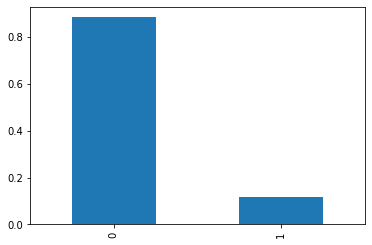

In [153]:
# Comprueba el desequilibrio de clases con value_counts()

class_frequency = df["insurance_benefits_received"].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Como se aprecia en la figura, existe un fuerte desequilibrio de clases. Aproximadmente un 88% de los usuarios no recibe beneficios en contraste con quienes reciben algún beneficio. 

In [154]:
# Función para la evaluación de las predicción de la clasifición

def eval_classifier(y_true, y_pred):
    """
    Función para la evalución de los resultados 
    de clasificación en donde:
    
    y_true: objetivo
    y_pred: predicciones
    
    """
       
    # Calcula la métrica de evaluación F1 para las predicciones
    f1_score = sklearn.metrics.f1_score(y_true, y_pred) 
    
    # Imprime los resutlados de F1 con precisión de dos dígitos
    print(f'F1: {f1_score:.2f}') 
    
    # Calcula los resutlados de la matriz de confusión    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all') 
    print('Matriz de confusión')
    
    # Imprime los resultados de la matriz de confusión
    print(cm) 

In [155]:
# Generar la salida de un modelo aleatorio ("dummy")

def rnd_model_predict(P, size, seed=42):
    
    """
    Función para la generación  
    de un modelo aleatorio ("dummy")
    en donde:
    
    P: probabilidad de éxito
    size: predicciones
    seed: tamaño de la serie de datos
    
    """
    
    # Genera números aleatorios con valor de semila igual a 42
    rng = np.random.default_rng(seed=seed) 
    
    # Usa los valores aleatorios generados para devolver una distribución de datos binomial en donde:
        #"n" es el número de intentos (fijando en 1) 
        
    return rng.binomial(n=1, p=P, size=size)   

In [156]:
# Ejecuta la función de evaluación de resultados de la predicción de clasificación para cuatro valores de probabilidad 

# Bucle que recorre los distintos valores de probabilidad
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]: 
    
    # Imprime el valor de probabilidad con presición de dos dígitos
    print(f'La probabilidad: {P:.2f}') 
    
    # Genera los valores de predicción para el modelo aleatorio binomial ("dummy")
    y_pred_rnd = rnd_model_predict(P, len(df), seed=42) 
    
    #Evalúa los valores de predicción para el modelo aleatorio binomial ("dummy")
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd) 
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

La probabilidad: 0.12
F1: 0.13
Matriz de confusión
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

La probabilidad: 0.50
F1: 0.19
Matriz de confusión
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

La probabilidad: 1.00
F1: 0.21
Matriz de confusión
[[0.         0.88384568]
 [0.         0.11615432]]



In [157]:
# División de los datos en conjuntos de entrenamiento y prueba (datos no escalados)

# Selecciona los datos de características
features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1) 

# Selecciona los datos objetivo
target = df['insurance_benefits_received'] 

# Ejecuta la división del conjuto de datos en entrenamiento y prueba

features_train, features_test, target_train, target_test = train_test_split( 
    features, target, test_size=0.3, random_state=12345)

In [158]:
# Comprobación de las dimensiones de los conjuntos de datos
features_train.shape, target_train.shape, features_test.shape, target_test.shape

((3392, 4), (3392,), (1455, 4), (1455,))

In [159]:
# Función que modela la clasifición usando el algoritmo de vecinos cercanos (KNN)

def classification_model(features_train, target_train, features_test, k):
    
    """
    La función predice si el usuario recibirá beneficios de seguro 
    en base a encontrar los usuarios más parecidos al objeto de estudio
    
    """
    
    # Crea la instancia del modelo de vencinos cercanos (KNN)
    model = KNeighborsClassifier(n_neighbors=k) 
    
    # Ajusta el modelo a los datos de entrenamiento
    model.fit(features_train, target_train)
    
    # Hace predicciones en base a los datos-características-de prueba 
    y_pred = model.predict(features_test)
    
    # Devuelve los resultados de la predicciones
    return y_pred 

In [160]:
# Evaluación del algoritmo de calsificación para datos no escalados

# Después de varias corridas/pruebas se escoge que k (número de vecinos cercanos) 
# varíe de 1 a 10. Después de 10 el F1 se estabiliza en 0 

for k in range(1, 11):
    
    # Hace predicciones para cada valor de k llamando a la función "classification_model"
    y_pred = classification_model(features_train, target_train, features_test, k)  
    
    # Imprime el título de resultado en función del valor de k
    print('Para k={}'.format(k))
    
    #Ejecuta la función de evlaución de resutlados de clasificación "eval_classifier"
    eval_classifier(target_test, y_pred) 
    print()

Para k=1
F1: 0.67
Matriz de confusión
[[0.86185567 0.02268041]
 [0.04536082 0.07010309]]

Para k=2
F1: 0.37
Matriz de confusión
[[0.87972509 0.004811  ]
 [0.08797251 0.02749141]]

Para k=3
F1: 0.38
Matriz de confusión
[[0.87147766 0.01305842]
 [0.08522337 0.03024055]]

Para k=4
F1: 0.18
Matriz de confusión
[[0.87972509 0.004811  ]
 [0.10378007 0.01168385]]

Para k=5
F1: 0.23
Matriz de confusión
[[0.87766323 0.00687285]
 [0.09965636 0.01580756]]

Para k=6
F1: 0.06
Matriz de confusión
[[8.83848797e-01 6.87285223e-04]
 [1.12027491e-01 3.43642612e-03]]

Para k=7
F1: 0.07
Matriz de confusión
[[0.88316151 0.00137457]
 [0.11134021 0.00412371]]

Para k=8
F1: 0.00
Matriz de confusión
[[0.88453608 0.        ]
 [0.11546392 0.        ]]

Para k=9
F1: 0.01
Matriz de confusión
[[8.84536082e-01 0.00000000e+00]
 [1.14776632e-01 6.87285223e-04]]

Para k=10
F1: 0.00
Matriz de confusión
[[0.88453608 0.        ]
 [0.11546392 0.        ]]



In [161]:
# Calcula el objetivo (datos escalados)

df_scaled['insurance_benefits_received'] = df_scaled['insurance_benefits'].apply(lambda x: 1 if x >= 1 else x)
df_scaled['insurance_benefits_received']

0       0
1       1
2       0
3       0
4       0
       ..
4842    0
4843    0
4844    0
4845    0
4846    0
Name: insurance_benefits_received, Length: 4847, dtype: int64

In [162]:
# División de los datos en conjuntos de entrenamiento y prueba (datos escalados)

features_scaled = df_scaled.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1) #Selecciona los datos de características
target_scaled = df_scaled['insurance_benefits_received'] #Selecciona los datos objetivo

features_scaled_train, features_scaled_test, target_scaled_train, target_scaled_test = train_test_split( #Ejecuta la división del conjuto de datos en entrenamiento y prueba
    features_scaled, target_scaled, test_size=0.3, random_state=12345)

In [163]:
# Evaluación del algoritmo de calsificación para datos escalados

# Después de varias corridas/pruebas se escoge que k (número de vecinos cercanos) 
# varíe de 1 a 10. Después de 10 el F1 se estabiliza en 0.86/0.87 

for k in range(1, 11):     
    
    # Hace predicciones para cada valor de k llamando a la función "classification_model" 
    y_pred_scaled = classification_model(features_scaled_train, target_scaled_train, features_scaled_test, k) 
    
    # Imprime el título de resultado en función del valor de k
    print('Para k={} (datos escalados)'.format(k)) 
    
    # Ejecuta la función de evlaución de resutlados de clasificación "eval_classifier"
    eval_classifier(target_scaled_test, y_pred_scaled) 
    print()

Para k=1 (datos escalados)
F1: 0.93
Matriz de confusión
[[0.87972509 0.004811  ]
 [0.01168385 0.10378007]]

Para k=2 (datos escalados)
F1: 0.89
Matriz de confusión
[[0.88247423 0.00206186]
 [0.02199313 0.09347079]]

Para k=3 (datos escalados)
F1: 0.91
Matriz de confusión
[[0.88041237 0.00412371]
 [0.01649485 0.09896907]]

Para k=4 (datos escalados)
F1: 0.88
Matriz de confusión
[[0.88178694 0.00274914]
 [0.0233677  0.09209622]]

Para k=5 (datos escalados)
F1: 0.89
Matriz de confusión
[[0.87972509 0.004811  ]
 [0.0185567  0.09690722]]

Para k=6 (datos escalados)
F1: 0.87
Matriz de confusión
[[0.88178694 0.00274914]
 [0.02405498 0.09140893]]

Para k=7 (datos escalados)
F1: 0.90
Matriz de confusión
[[0.88178694 0.00274914]
 [0.01924399 0.09621993]]

Para k=8 (datos escalados)
F1: 0.86
Matriz de confusión
[[0.88178694 0.00274914]
 [0.02542955 0.09003436]]

Para k=9 (datos escalados)
F1: 0.87
Matriz de confusión
[[0.88178694 0.00274914]
 [0.02405498 0.09140893]]

Para k=10 (datos escalados)


<p style="text-align: center;'font-weight: bold">Resumen de resultados de la evaluación de la métrica F1</p>  

| **K** | **F1 Scaled** | **F1 Unscaled** |
|:-----:|---------------|-----------------|
|   1   |      0.93     |       0.67      |
|   2   |      0.89     |       0.37      |
|   3   |      0.91     |       0.38      |
|   4   |      0.88     |       0.18      |
|   5   |      0.89     |       0.23      |
|   6   |      0.87     |       0.06      |
|   7   |      0.90     |       0.07      |
|   8   |      0.86     |       0.00      |
|   9   |      0.87     |       0.01      |
|   10  |      0.86     |       0.00      |

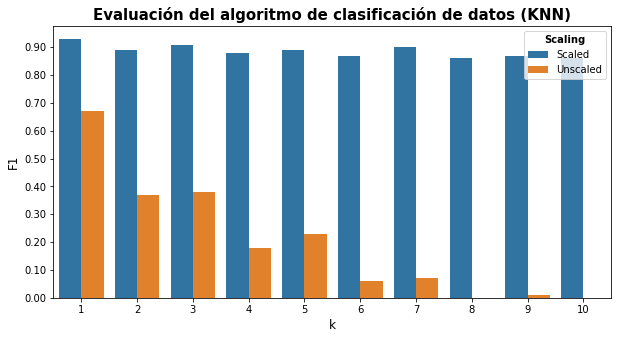

In [164]:
# Gráfico de barras

# Genera una lista de datos

data = [(1,0.93, "Scaled"), (2,0.89, "Scaled"), (3,0.91,"Scaled"), (4,0.88,"Scaled"), 
      (5,0.89,"Scaled"), (6,0.87,"Scaled"), (7,0.90,"Scaled"), (8,0.86,"Scaled"),
     (9,0.87,"Scaled"),(10, 0.86,"Scaled"),(1, 0.67,"Unscaled"),(2,0.37,"Unscaled"),
      (3,0.38,"Unscaled"),(4,0.18,"Unscaled"),(5,0.23,"Unscaled"),(6,0.06,"Unscaled"),
      (7,0.07,"Unscaled"),(8,0.00,"Unscaled"),(9,0.01,"Unscaled"),(10,0.00,"Unscaled")]

# Crea un dataframe
df_summary = pd.DataFrame(data, columns =['k', 'F1', 'Scaling']) 

# Establece el tamaño de la figura
plt.figure(figsize=(10, 5))

# Genera la figura
g = sns.barplot(data=df_summary, x="k", y="F1", hue='Scaling')

# Añade título y etiquetas a los ejes 

plt.title('Evaluación del algoritmo de clasificación de datos (KNN)', fontweight="bold", fontsize = 15)
plt.xlabel('k', fontsize = 12)
plt.ylabel('F1', fontsize = 12)

# Formato leyenda

plt.setp(g.get_legend().get_texts(), fontsize='10')
plt.setp(g.get_legend().get_title(), fontsize='10', fontweight="bold")

# Formato de eje y

plt.yticks(np.arange(0.00, 1.00, step=0.10))
g.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


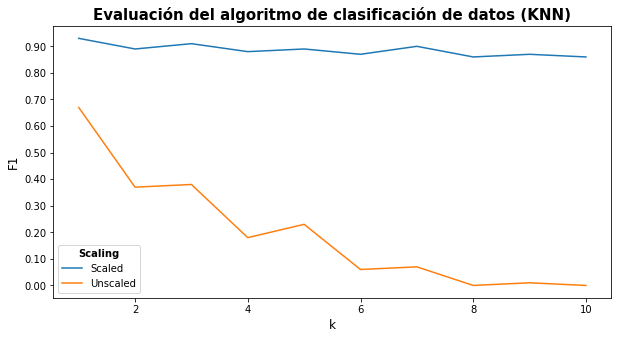

In [165]:
# Gráfico de lineas

# Establece el tamaño de la figura
plt.figure(figsize=(10, 5))

# Genera la figura
g = sns.lineplot(data=df_summary, x="k", y="F1", hue='Scaling')

# Añade título y etiquetas a los ejes 

plt.title('Evaluación del algoritmo de clasificación de datos (KNN)', fontweight="bold", fontsize = 15)
plt.xlabel('k', fontsize = 12)
plt.ylabel('F1', fontsize = 12)

# Formato leyenda

plt.setp(g.get_legend().get_texts(), fontsize='10')
plt.setp(g.get_legend().get_title(), fontsize='10', fontweight="bold")

# Formato de eje y

plt.yticks(np.arange(0.00, 1.00, step=0.10))
g.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

**Conclusiones intermedias sobre la**<br>
**investigación de la probabilidad de que un cliente reciba beneficios (tarea 2)**   

1. Existe una notable diferencia entre los resultados de la predicciones del modelo de clasificación, basado en el algoritmo de vecinos más cercanos ("KNN" por sus siglas en inglés), usando datos escalados y no escalados. El uso de datos escalados mejora el rendimiento del modelo de clasificación, usando como métrica de evaluación el puntaje "F1", elevando el poder de predicción de F1 de un rango de 0.00 a 0.67 con datos no escalados, a resultados entre 0.86 a 0.93 con datos escalados. 
<br>

2. Los resultados del numeral anterior se basan en iteraciones del modelo de predicción usando un número "k" de vecinos más cercanos igual a 10. Tanto para datos escalados como no escalados, los resultados de la métrica de evaluación F1 tienden a estabilizarse (en ambos casos) a partir de este límite de k.
<br>

3. Los resultados del modelo de clasificación (usando el algoritmo "KNN") entrenado con datos escalados, pasa la prueba de cordura al ser comparados con las salidas del modelo aleatorio binomial ("dummy"). Para distintas probabilidades de éxito, los resultados del puntaje F1 del modelo "dummy" oscilan entre 0.0 a 0.21, lo cual es un rango inferior a los resultados del modelo con datos escalados (F1 entre 0.86 y 0.93). Cabe señalar que el modelo con datos no escalados no pasa la prueba de cordura, pues su rango de resultados de F1 va de 0.00 a 0.67. Es decir, existe la posibilidad de obtener resultados aleatorios con datos no escalados, y por ende, el modelo no es útil.
<br>

4. En este caso, el número óptimo de vecinos más cercanos para el ajuste del modelo es de k=1. Este valor de k es el que mejor equilibra los resultados de la matriz de confusión.   

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [166]:
# Clase para la modelación lineal en base a álgebra lineal

class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # Agrega a la primera columna del conjunto
        # de entrenamiento una columna de unos
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)    
                                                          
        # Cálculo del vector de pesos
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)   

    def predict(self, X):
        
        # Agrega a la primera columna del conjunto
        # de entrenamiento una columna de unos
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1) 
                                                            
        # Producto punto de la matriz de entrenamiento por el vector de pesos 
        y_pred = np.dot(X2, self.weights) 
        
        return y_pred

In [167]:
#Función para la evaluación del modelo lineal

def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [168]:
# División de datos en conjuntos de entrenamiento y prueba datos no escaldos

X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


In [169]:
# División de datos en conjuntos de entrenamiento y prueba datos escalados

X_scaled = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y_scaled = df_scaled['insurance_benefits'].to_numpy()

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

lr_scaled = MyLinearRegression()

lr_scaled.fit(X_train_scaled, y_train_scaled)
print(lr_scaled.weights)

y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
eval_regressor(y_test_scaled, y_test_pred_scaled)

[-0.97736673  2.32727489  0.01955949  0.04624156 -0.07297105]
RMSE: 0.36
R2: 0.66


**Conclusiones intermedias sobre la**<br>
**modelación usando regresión lineal (tarea 3)**  

1. Los resultados de la evaluación del modelo lineal para la predición de la cantidad de beneficios que probablemente recibirá un nuevo cliente determinan que los datos de las características con los que se cuentan no son suficientes para tener un modelo robusto. Tanto para los datos escalados como no escalados la RMSE fue de 0.36 y el R2 de 0.66. 

2. En este caso el escalado de datos no afectó la inferencia estadística. Esto se debe a que la modelación ajusta los valores de las características para que sean coherentes con los valores de la variable objetivo.    

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [170]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [171]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [172]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [173]:
P_id = np.dot(P,np.linalg.inv(P))
P_id

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

La matriz es invertible por cuanto la misma multiplicada por su inversa da como resultado la matriz identidad. Como se ve en la matriz, la diagonal es uno, y el resto de valores son prácticamente cero.

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [174]:
X_of = X@P
X_of = X_of
X_of

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Los datos se encuentran ofuscados. Por lo tanto, no es posible conocer la edad de los clientes.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [175]:
X = X_of@np.linalg.inv(P)
X = X
X

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Como se ve en los resultados, los datos fueron recuperados, y ahora se pueden ver de nuevo las edades de los clientes en la segunda columna.

Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [176]:
# Datos originales
df.head(3)

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0
1,0,46,38000.0,1,1,1
2,0,29,21000.0,0,0,0


In [177]:
# Datos ofuscados
pd.DataFrame(X_of, columns=feature_names).head(3)

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631


In [178]:
# Datos recuperados
pd.DataFrame(X, columns=feature_names).head(3)

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Cuando se recuperan los datos enmascarados, es posible que no produzcan los mismos resultados que los datos originales debido a la posible pérdida de información, la aleatoriedad inherente y las limitaciones de enmascaramiento. Por eso, es importante considerar detenidamente las implicaciones del enmascaramiento de datos y las limitaciones de las técnicas de enmascaramiento utilizadas al recuperar y analizar datos enmascarados. 

El impacto del enmascaramiento de datos en los resutlados de la modelación (lineal) se analizará a continuación.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

Para realizar esta demonstración analítca, se empezará por presentar la ecuación de pesos con datos ofuscados. De esta forma se tiene: 

$$
{w_{p}} = {[(XP)^T XP]^{-1}(XP)^Ty}    
$$

Aplicando  la reversibilidad de la transposición de matrices en $(XP^T)$ obtenemos lo siguiente:

$$
{w_{p}} = {[P^TX^T(XP)]^{-1}P^TX^Ty}     
$$

Al aplicar la identidad multiplicativa para distribuir la inversa se tiene que:

$$
w_{p} = {P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty} 
$$

A partir del resultado anterior se puede obtener la matriz identidad de $(P^T)^{-1}P^T$. Entonces el resultado es:

$$
w_{p} = {P^{-1}(X^TX)^{-1}IX^Ty}
$$

Recordemos que:

$$
w = {(X^TX)^{-1}X^Ty}
$$


Si sustituimos $w$ en $w_{p}$ obtenemos:

$$
w_{p} = {P^{-1}w}
$$

Hay que recordar que los datos ofucados son igual a:

$$
X_{p} = XP 
$$

Por otra parte, las prediciones con datos originales y ofuscados son iguales a:


$$
a = Xw
$$

$$
a_{p} = X_{p}w_{p} 
$$

Si reeemplazamos $w_{p} = wP^{-1}$ en la ecuación de predicciones de datos ofuscados tenemos:

$$
a_{p} = X_{p}wP^{-1} 
$$

Reemplanzado $X_{p} = XP$ en la ecuación de predicciones con datos ofuscados tendríamos:

$$
a_{p} = XPwP^{-1}
$$

La multiplicación de una matriz por su inversa (en este caso $PP^{-1}$) es igual a la matriz identidad:

$$
a_{p} = XIw
$$

La multiplicación de una matriz (en este caso $X$) por la matriz identidad es igual a la misma matriz:

$$
a_{p} = Xw
$$

En virtud de que las prediciones sin ofuscación son igual a $a = Xw$ tenemos que:

a$$
a = a_{p} 
$$ 

De esta forma demostramos que las predicciones con datos ofucados son (en teoría) iguales a las prediciones con datos originales.

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- 
- Utiliza $XP$ como la nueva matriz de características

In [179]:
# Función para crear matriz de datos ofuscados
 
def ofuscated_matrix(X_test):
    """
    Genera una matriz ofuscada en base a una matriz cuadrada aleatoria  
    de dimensión n x n generada con números aleatorios a partir del 
    tamaño de los datos de prueba.
    
    Argumentos:
    X_test: ingresa los datos de prueba para obtener 
    el tamaño de la matriz cuadrada y generer matriz ofuscada
        
    Devuelve:
    numpy.ndarray: matriz ofuscada (X)
    """
    
    n = X_test.shape[1]
    
    # Genera una matriz aleatoria de dimensión n x n 
    rand_matrix = np.random.rand(n, n) 
     
    # Usa la técnica de valor singular de descomposición 
    # para obtener los valores singulares y vectores
    
    U, S, V = np.linalg.svd(rand_matrix) 
    
    # Reemplaza los valores singulares con valores positivos
    # para asegurar que la matriz sea aleatoria sea invertible
    
    S[S < 0.5] = 0.5
    
    # Construye la matriz invertible 
    invertible_matrix = U @ np.diag(S) @ V
    
    # Genera la matriz ofuscada a partir de 
    # los datos originales y la matriz invertible
    
    X = X_test @ invertible_matrix
    
    return X

In [180]:
# Modelación lineal con datos ofuscados (no escalados)

X_ofuscated = ofuscated_matrix(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_ofuscated, y, test_size=0.3, random_state=12345)

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred_ofuscated = lr.predict(X_test)
eval_regressor(y_test, y_test_pred_ofuscated)

[-0.97736672  0.01783195  0.01717415 -0.04146915  0.03761961]
RMSE: 0.36
R2: 0.66


In [181]:
# Modelación lineal con datos ofuscados (escalados)

X_ofuscated = ofuscated_matrix(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_ofuscated, y, test_size=0.3, random_state=12345)

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred_ofuscated = lr.predict(X_test)
eval_regressor(y_test, y_test_pred_ofuscated)

[-0.97736673 -2.46264996  1.5999131   1.35568642  0.31855939]
RMSE: 0.36
R2: 0.66


**Conclusiones intermedias ofucación de datos (tarea 4)**

1. Cuando se recuperan los datos enmascarados, es posible que no produzcan los mismos resultados que los datos originales debido a la posible pérdida de información, la aleatoriedad inherente y las limitaciones de enmascaramiento. Por eso, es importante considerar detenidamente las implicaciones del enmascaramiento de datos y las limitaciones de las técnicas de enmascaramiento utilizadas al recuperar y analizar datos enmascarados.

2. Se demostró analíticamente que las predicciones con datos ofuscados son (en teoría) iguales a las predicciones con datos originales.

3. Aplicando una función de ofuscación de matrices, se comprobó que los resultados de predicción de la modelación lineal usando datos originales y enmascarados (escalados y no escalados) son iguales en todos los casos (RMSE=0.36 y R2=0.66).

# Conclusiones

1. La variable de edad tiene un sesgo hacia la derecha. Es decir, aunque la mayoría de los usuarios tienen un rango de edad de 25 a 40 años, existe un grupo importante de usuarios con edades que oscilan alrededor de los 60 años.
<br>

2. La correlación más importante entre las variables es la de edad y beneficios de seguro. Como se esperaría, mientras mayor sea la edad del usuario el mismo reclama mayores beneficios de seguro (correlación positiva de 0.65).
<br>

1. Existe una notable diferencia entre los resultados de la predicciones del modelo de clasificación, basado en el algoritmo de vecinos más cercanos ("KNN" por sus siglas en inglés), usando datos escalados y no escalados. El uso de datos escalados mejora el rendimiento del modelo de clasificación, usando como métrica de evaluación el puntaje "F1", elevando el poder de predicción de F1 de un rango de 0.00 a 0.67 con datos no escalados, a resultados entre 0.86 a 0.93 con datos escalados. 
<br>

2. Los resultados del numeral anterior se basan en iteraciones del modelo de predicción usando un número "k" de vecinos más cercanos igual a 10. Tanto para datos escalados como no escalados, los resultados de la métrica de evaluación F1 tienden a estabilizarse (en ambos casos) a partir de este límite de k.
<br>

3. Los resultados del modelo de clasificación (usando el algoritmo "KNN") entrenado con datos escalados, pasa la prueba de cordura al ser comparados con las salidas del modelo aleatorio binomial ("dummy"). Para distintas probabilidades de éxito, los resultados del puntaje F1 del modelo "dummy" oscilan entre 0.0 a 0.21, lo cual es un rango inferior a los resultados del modelo con datos escalados (F1 entre 0.86 y 0.93). Cabe señalar que el modelo con datos no escalados no pasa la prueba de cordura, pues su rango de resultados de F1 va de 0.00 a 0.67. Es decir, existe la posibilidad de obtener resultados aleatorios con datos no escalados, y por ende, el modelo no es útil.
<br>

4. En este caso, el número óptimo de vecinos más cercanos para el ajuste del modelo es de k=1. Este valor de k es el que mejor equilibra los resultados de la matriz de confusión.
<br>

5. Los resultados de la evaluación del modelo lineal para la predición de la cantidad de beneficios que probablemente recibirá un nuevo cliente determinan que los datos de las características con los que se cuentan no son suficientes para tener un modelo robusto. Tanto para los datos escalados como no escalados la RMSE fue de 0.36 y el R2 de 0.66. 
<br>

6. En este caso el escalado de datos no afectó la inferencia estadística. Esto probablemente se debe a que la modelación ajusta los valores de las características para que sean coherentes con los valores de la variable objetivo.  
<br>

7. Cuando se recuperan los datos enmascarados, es posible que no produzcan los mismos resultados que los datos originales debido a la posible pérdida de información, la aleatoriedad inherente y las limitaciones de enmascaramiento. Por eso, es importante considerar detenidamente las implicaciones del enmascaramiento de datos y las limitaciones de las técnicas de enmascaramiento utilizadas al recuperar y analizar datos enmascarados.
<br>

8. Se demostró analíticamente que las predicciones con datos ofuscados son (en teoría) iguales a las predicciones con datos originales.
<br>

9. Aplicando una función de ofuscación de matrices, se comprobó que los resultados de predicción de la modelación lineal usando datos originales y enmascarados (escalados y no escalados) son iguales en todos los casos (RMSE=0.36 y R2=0.66).


# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores- [x]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [x]  Se ha realizado la tarea 1
    - [x]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [x]  Se probó el procedimiento para las cuatro combinaciones propuestas    - [x]  Se respondieron las preguntas sobre la escala/distancia- [x]  Se ha realizado la tarea 2
    - [x]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    - [x]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.- [x]  Se ha realizado la tarea 3
    - [x]  Se implementó la solución de regresión lineal mediante operaciones matriciales    - [x]  Se calculó la RECM para la solución implementada- [x]  Se ha realizado la tarea 4
    - [x]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [x]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [x]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    - [x]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM- [x]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>